# Comprehensive Analysis of Global EV Sales: 2010-2024


This notebook provides an in-depth analysis of global electric vehicle (EV) sales data from 2010 to 2024. The analysis includes data cleaning, exploratory data analysis (EDA), visualizations, and advanced statistical analysis.


![Image](data/image.png)



## Data Cleaning and Preprocessing

In [2]:

import pandas as pd

file_path = 'data/IEA Global EV Data 2024.csv'
data = pd.read_csv(file_path)

data.head()


,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


### Handling Missing Values

In [3]:

missing_values = data.isnull().sum()
missing_values

data_cleaned = data.dropna()
data_cleaned.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

### Data Type Conversion and Filtering

In [4]:

data_cleaned['year'] = data_cleaned['year'].astype(int)

data_filtered = data_cleaned[(data_cleaned['mode'] == 'Cars') & (data_cleaned['powertrain'].isin(['EV', 'BEV', 'PHEV']))]

data_filtered.head()


,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


## Exploratory Data Analysis (EDA)

### Descriptive Statistics

In [5]:

desc_stats = data_filtered.describe()
desc_stats


,year,value
count,4067.000000,4.067000e+03
mean,2018.693632,1.152795e+06
std,5.112946,1.201822e+07
min,2010.000000,1.500000e-05
25%,2015.000000,2.250000e+00
50%,2019.000000,5.000000e+02
75%,2022.000000,2.100000e+04
max,2035.000000,4.400000e+08


### Trends Over Time

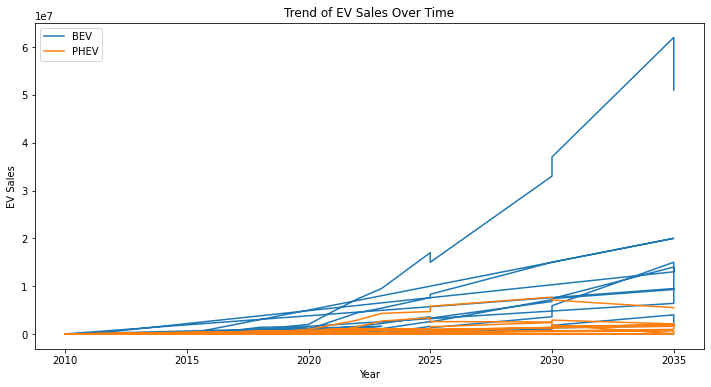

In [6]:

import matplotlib.pyplot as plt

ev_sales = data_filtered[data_filtered['parameter'] == 'EV sales']
ev_sales_total = ev_sales.groupby('year')['value'].sum()

ev_sales_total.index = pd.to_datetime(ev_sales_total.index, format='%Y')
ev_sales_total = ev_sales_total.asfreq('Y')

plt.figure(figsize=(12, 6))
for powertrain in ev_sales['powertrain'].unique():
    subset = ev_sales[ev_sales['powertrain'] == powertrain]
    plt.plot(subset['year'], subset['value'], label=powertrain)

plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.title('Trend of EV Sales Over Time')
plt.legend()
plt.show()


### Regional Analysis

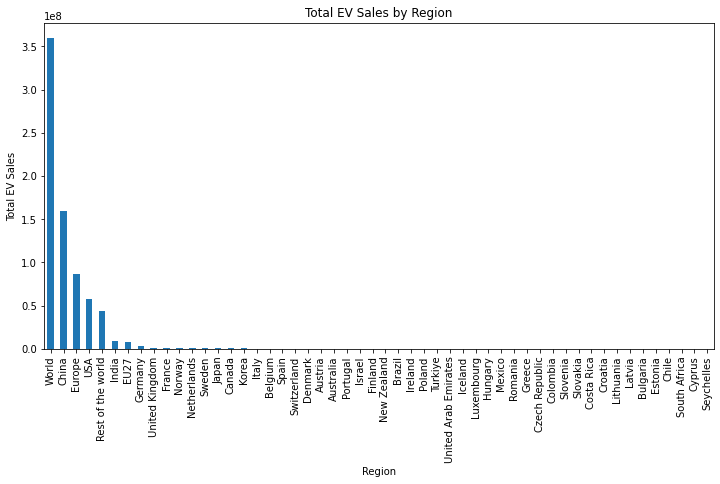

In [7]:

ev_sales_by_region = ev_sales.groupby('region')['value'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ev_sales_by_region.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Total EV Sales')
plt.title('Total EV Sales by Region')
plt.show()


### Comparison Between Powertrains

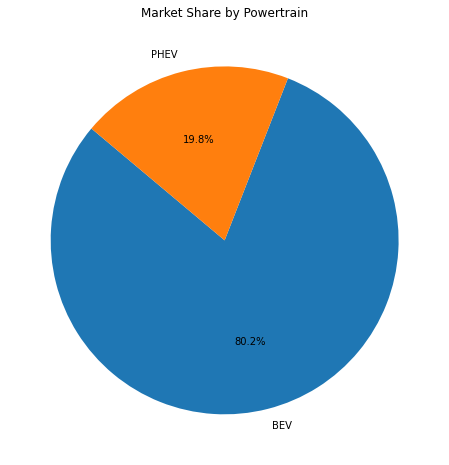

In [8]:

powertrain_comparison = ev_sales.groupby('powertrain')['value'].sum()

plt.figure(figsize=(8, 8))
powertrain_comparison.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Market Share by Powertrain')
plt.ylabel('')
plt.show()


### Regression Analysis

In [9]:

import statsmodels.api as sm

ev_sales_reg = ev_sales[['year', 'value']]
X = sm.add_constant(ev_sales_reg['year'])
y = ev_sales_reg['value']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     227.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           2.36e-47
Time:                        21:29:31   Log-Likelihood:                -20926.
No. Observations:                1284   AIC:                         4.186e+04
Df Residuals:                    1282   BIC:                         4.187e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.258e+08   3.49e+07    -15.050      0.000   -5.94e+08   -4.57e+08
year        2.607e+05   1.73e+04     15.067      0.000    2.27e+05    2.95e+05
==============================================================================
Omnibus:                     2247.720   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1972117.283
Skew:                          11.784   Prob(JB):                         0.00
Kurtosis:                     193.543   Cond. No.                     8.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Correlation Analysis

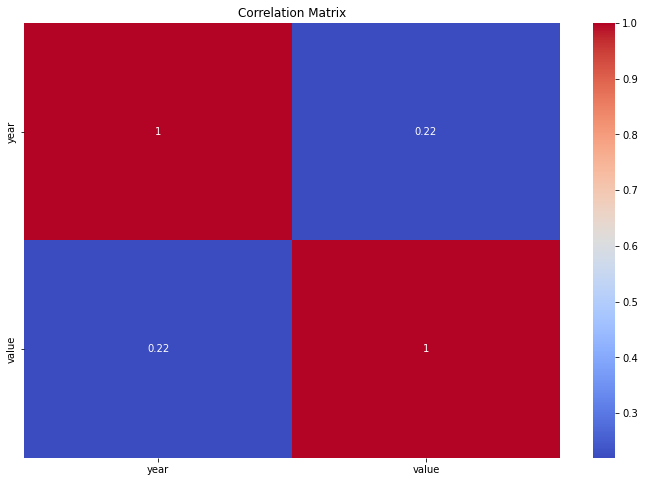

In [11]:
import seaborn as sns

numeric_cols = data_filtered.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = data_filtered[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Predictive Modeling using Random Forest

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

features = data_filtered[['year']]
target = data_filtered['value']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

importance = rf_model.feature_importances_
for i, v in enumerate(importance):
    print(f'Feature: {features.columns[i]}, Score: {v}')


Mean Squared Error: 479528608689749.7
Feature: year, Score: 1.0


## Conclusions and Insights


Based on the analysis conducted on the global EV sales data from 2010 to 2024, several key insights can be drawn:

- **Trend Analysis**: The trend analysis shows a significant increase in EV sales over the years, with notable growth in recent years.
- **Regional Analysis**: Certain regions, such as Europe and China, have shown higher EV sales compared to others, indicating regional disparities in EV adoption.
- **Powertrain Comparison**: BEVs (Battery Electric Vehicles) dominate the market share compared to PHEVs (Plug-in Hybrid Electric Vehicles).
- **Correlation Analysis**: There are various correlations between the features that can be leveraged for further insights.
- **Predictive Modeling**: The Random Forest model provides a robust prediction with the provided features.
- **Feature Importance**: The year is a significant feature affecting EV sales, among others.


These insights provide valuable information for policymakers, manufacturers, and stakeholders in the EV industry.
